# PyTorch basics

### package

In [2]:
import os
import torch
import numpy as np

In [4]:
torch.cuda.is_available()
!nvidia-smi

Mon May 22 11:18:59 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    24W / 300W |      2MiB / 16384MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Tensor


### create tensor directly


In [5]:
# create tensor
# torch.tensor(data, dtype=None, device=None, requires_grad=False, pin_memory=False)
arr = np.ones((3,3))
print(arr.dtype)
print(arr)
t1 = torch.tensor(arr)
print(t1)

t2 = torch.from_numpy(arr)
print(t2)

arr[0,0] = 2
print(t1)
print(t2)

float64
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
tensor([[2., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)


In [6]:
# create tensor with 0s
# torch.zeros(*size, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False)
out_z=torch.tensor([1])
z=torch.zeros((3,3),out=out_z)
print(id(z),id(out_z), id(z)==id(out_z))
print(torch.ones(3,3))

139958660600496 139958660600496 True
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])


In [7]:
# create 0 tensor by scale
# torch.zeros_like(input, dtype=None, layout=None, device=None, requires_grad=False, memory_format=torch.preserve_format)
ipt=torch.tensor([[1,2,3,4],[2,3,4,5],[3,4,5,6]])
torch.zeros_like(ipt)

tensor([[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]])

In [8]:
# torch.full(size, fill_value, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False)
size = (3,3,3)
full_value=6
f = torch.tensor(size)
print(torch.full(size,full_value))
print(torch.full_like(f,full_value))

tensor([[[6, 6, 6],
         [6, 6, 6],
         [6, 6, 6]],

        [[6, 6, 6],
         [6, 6, 6],
         [6, 6, 6]],

        [[6, 6, 6],
         [6, 6, 6],
         [6, 6, 6]]])
tensor([6, 6, 6])


In [9]:
# a range of numbers with equal distance
# torch.arange(start=0, end, step=1, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False)
print(torch.arange(2,10))
print(torch.arange(2,10,2))

tensor([2, 3, 4, 5, 6, 7, 8, 9])
tensor([2, 4, 6, 8])


In [10]:
# uniformly divided
# torch.linspace(start, end, steps=100, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False)
print(torch.linspace(2,10,5))
print(torch.linspace(2,20,5))

tensor([ 2.,  4.,  6.,  8., 10.])
tensor([ 2.0000,  6.5000, 11.0000, 15.5000, 20.0000])


In [11]:
# torch.logspace(start, end, steps=100, base=10.0, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False)
torch.logspace(2,10,6)

tensor([1.0000e+02, 3.9811e+03, 1.5849e+05, 6.3096e+06, 2.5119e+08, 1.0000e+10])

In [12]:
# create diagonal matrix
# torch.eye(n, m=None, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False)
print(torch.eye(4))
print(torch.eye(3,4))

tensor([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]])
tensor([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.]])


### create tensor in probability

In [13]:
# normal distribution
# torch.normal(mean, std, *, generator=None, out=None)
size=(3,4)
torch.normal(0,1,size)

tensor([[-0.5587, -0.5065, -0.7504, -0.4256],
        [-0.8237,  0.1191,  1.0307,  1.0900],
        [-0.0405, -0.8348,  1.7847, -0.1077]])

In [14]:
# standard normal distribution
# torch.randn(*size, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False)
size=(3,4)
torch.randn(size)

tensor([[-0.0982, -0.0254, -0.5112, -0.8790],
        [ 2.3174, -0.4678, -0.2327, -0.4854],
        [ 1.0344, -0.0799,  2.1592, -0.0191]])

In [15]:
# uniform distribution range(0,1)
# torch.rand(*size, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False)
torch.rand((3,4))

tensor([[0.1486, 0.0396, 0.1683, 0.5990],
        [0.0476, 0.0256, 0.1072, 0.3672],
        [0.1583, 0.2624, 0.7626, 0.1541]])

In [16]:
# random integer in a given range
# randint(low=0, high, size, *, generator=None, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False)
size=(3,4)
torch.randint(0,11,size)

tensor([[ 4,  4,  8, 10],
        [ 8,  3,  3,  9],
        [ 6,  2,  0,  2]])

In [17]:
# integers random permutation
# torch.randperm(n, out=None, dtype=torch.int64, layout=torch.strided, device=None, requires_grad=False)
torch.randperm(3)

tensor([1, 2, 0])

In [32]:
# bernouli distribution
# torch.bernoulli(input, *, generator=None, out=None)
torch.bernoulli(torch.tensor([0.3, 0.6, 0.8]))

tensor([0., 1., 1.])

## Operation

In [38]:
# concatenate tensors
# torch.cat(tensors, dim=0, out=None)
a = torch.ones((3,3))
b = torch.zeros((3,3))
c_0 = torch.cat([a,b],dim=0)
c_1 = torch.cat([a,b],dim=1)
print(c_0)
print(c_1)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
tensor([[1., 1., 1., 0., 0., 0.],
        [1., 1., 1., 0., 0., 0.],
        [1., 1., 1., 0., 0., 0.]])


In [43]:
# stack
# torch.stack(tensors, dim=0, out=None)
t=torch.ones(2,3)
print(t)
t_stack=torch.stack([t,t,t],dim=2)
print(t_stack)
t_stack=torch.stack([t,t,t],dim=0)
print(t_stack)


tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]])
tensor([[[1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.]]])


In [45]:
# chunk
# torch.chunk(input, chunks, dim=0)
a = torch.ones((2,7))
print(a)
list_of_tensors=torch.chunk(a,dim=1,chunks=3)
for i, t in enumerate(list_of_tensors):
  print("No.{} tensor:{}, shape is {}".format(i+1,t,t.shape))

tensor([[1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1.]])
the no.1 tensor:tensor([[1., 1., 1.],
        [1., 1., 1.]]), shape is torch.Size([2, 3])
the no.2 tensor:tensor([[1., 1., 1.],
        [1., 1., 1.]]), shape is torch.Size([2, 3])
the no.3 tensor:tensor([[1.],
        [1.]]), shape is torch.Size([2, 1])


In [47]:
# split
# torch.split(tensor, split_size_or_sections, dim=0)
t = torch.ones((2,5))
list_of_tensors = torch.split(t,[2,1,2], dim=1)
for i, t in enumerate(list_of_tensors):
  print("No.{} tensor: {}, shape is {}".format(i,t,t.shape))

No.0 tensor: tensor([[1., 1.],
        [1., 1.]]), shape is torch.Size([2, 2])
No.1 tensor: tensor([[1.],
        [1.]]), shape is torch.Size([2, 1])
No.2 tensor: tensor([[1., 1.],
        [1., 1.]]), shape is torch.Size([2, 2])


In [48]:
# select index
# torch.index_select(input, dim, index, out=None)
t = torch.randint(0,9,size=(3,3))
i = torch.tensor([0,2],dtype=torch.long)
t_select = torch.index_select(t,dim=0,index=i)
print("t:\n{}\nt_select:\n{}".format(t,t_select))

t:
tensor([[3, 0, 0],
        [2, 5, 4],
        [8, 8, 4]])
t_select:
tensor([[3, 0, 0],
        [8, 8, 4]])


In [49]:
# select mask
# torch.masked_select(input, mask, out=None)
t = torch.randint(0,9,size=(3,3))
mask = t.le(5)
t_select = torch.masked_select(t,mask)
print("t:\n{}\nmask:\n{}\nt_select:\n{} ".format(t, mask, t_select))

t:
tensor([[8, 6, 5],
        [5, 7, 2],
        [2, 6, 7]])
mask:
tensor([[False, False,  True],
        [ True, False,  True],
        [ True, False, False]])
t_select:
tensor([5, 5, 2, 2]) 


In [4]:
# reshape
# torch.reshape(input, shape)
t = torch.randperm(8)
t_reshape = torch.reshape(t,(-1,2,2))
print(t)
print(t_reshape)

tensor([7, 3, 6, 4, 2, 5, 0, 1])
tensor([[[7, 3],
         [6, 4]],

        [[2, 5],
         [0, 1]]])


In [5]:
# transpose
# torch.transpose(input, dim0, dim1)
t = torch.rand(2,3,4)
t_transpose=torch.transpose(t,dim0=1,dim1=2)
print(t)
print(t_transpose)

tensor([[[0.2484, 0.5820, 0.3001, 0.6033],
         [0.2139, 0.9359, 0.9355, 0.0076],
         [0.2250, 0.7845, 0.4469, 0.8766]],

        [[0.0188, 0.8267, 0.6129, 0.2870],
         [0.8876, 0.8199, 0.6063, 0.9094],
         [0.9289, 0.0266, 0.9344, 0.5805]]])
tensor([[[0.2484, 0.2139, 0.2250],
         [0.5820, 0.9359, 0.7845],
         [0.3001, 0.9355, 0.4469],
         [0.6033, 0.0076, 0.8766]],

        [[0.0188, 0.8876, 0.9289],
         [0.8267, 0.8199, 0.0266],
         [0.6129, 0.6063, 0.9344],
         [0.2870, 0.9094, 0.5805]]])


In [6]:
# squeeze, compress the dimension with length=1
# torch.squeeze(input, dim=None, out=None)
t = torch.rand((1,2,3,1))
t_sq = torch.squeeze(t)
t_0 = torch.squeeze(t,dim=0)
t_1 = torch.squeeze(t,dim=1)
print(t)
print(t_sq)
print(t_0)
print(t_1)

tensor([[[[0.7561],
          [0.4179],
          [0.0930]],

         [[0.2953],
          [0.1024],
          [0.8218]]]])
tensor([[0.7561, 0.4179, 0.0930],
        [0.2953, 0.1024, 0.8218]])
tensor([[[0.7561],
         [0.4179],
         [0.0930]],

        [[0.2953],
         [0.1024],
         [0.8218]]])
tensor([[[[0.7561],
          [0.4179],
          [0.0930]],

         [[0.2953],
          [0.1024],
          [0.8218]]]])


In [7]:
# unsqueeze, extend the dimension
# torch.unsqueeze(input, dim)

## Mathematical operation

In [9]:
# add
# torch.add(input, other, out=None)
# torch.add(input, other, *, alpha=1, out=None)
# torch.addcdiv(input, tensor1, tensor2, *, value=1, out=None)
# torch.addcmul(input, tensor1, tensor2, *, value=1, out=None)
t_0=torch.tensor([1,2,3])
t_1=torch.tensor([2,3,4])
torch.add(t_0,t_1)

tensor([3, 5, 7])

single-value linear regression
$$
y=wx+b
$$

epoch:0 train loss:7.164689540863037
epoch:100 train loss:0.8787064552307129
epoch:200 train loss:0.598065972328186
epoch:300 train loss:0.5071331262588501
epoch:400 train loss:0.4776690900325775
epoch:500 train loss:0.46812230348587036
epoch:600 train loss:0.46502891182899475
epoch:700 train loss:0.4640267491340637
epoch:800 train loss:0.46370187401771545
epoch:900 train loss:0.46359652280807495
epoch:1000 train loss:0.46356266736984253


Text(0.5, 1.0, 'epoch: 1000\nw: [2.0735748] b: [4.7864375]')

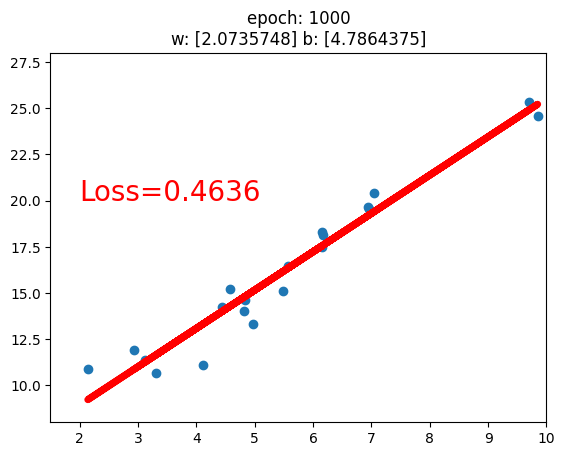

In [16]:
import torch
import matplotlib.pyplot as plt
torch.manual_seed(10)

lr = 0.05

# create training data
x = torch.rand(20, 1) * 10  # x data (tensor), shape=(20, 1)
# noise
y = 2*x + (5 + torch.randn(20, 1))  # y data (tensor), shape=(20, 1)

# parameter
w = torch.randn((1), requires_grad=True) 
b = torch.zeros((1), requires_grad=True) 

# training process
for epoch in range(1001):

    # compute prediction y
    wx = torch.mul(w, x)
    y_pred = torch.add(wx, b)

    # compute loss MSE
    loss = (0.5 * (y - y_pred) ** 2).mean()

    # backpropagation
    loss.backward()

    # update parameter
    b.data.sub_(lr * b.grad)
    w.data.sub_(lr * w.grad)

    # clear the gradient
    w.grad.zero_()
    b.grad.zero_()

    # plot
    if epoch % 100 == 0:

        print("epoch:{} train loss:{}".format(epoch,loss))

plt.scatter(x.data.numpy(), y.data.numpy())
plt.plot(x.data.numpy(), y_pred.data.numpy(), 'r-', lw=5)
plt.text(2, 20, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 20, 'color':  'red'})
plt.xlim(1.5, 10)
plt.ylim(8, 28)
plt.title("epoch: {}\nw: {} b: {}".format(epoch, w.data.numpy(), b.data.numpy()))